# Multivariate Outliers Detection

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## load data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
data.shape

(150, 5)

# Multivariate OUTLIERS detection for a df

In [5]:
# columns selection
col_x1 = ['petal length (cm)', 'petal width (cm)']
col_x2 = ['sepal length (cm)', 'sepal width (cm)']

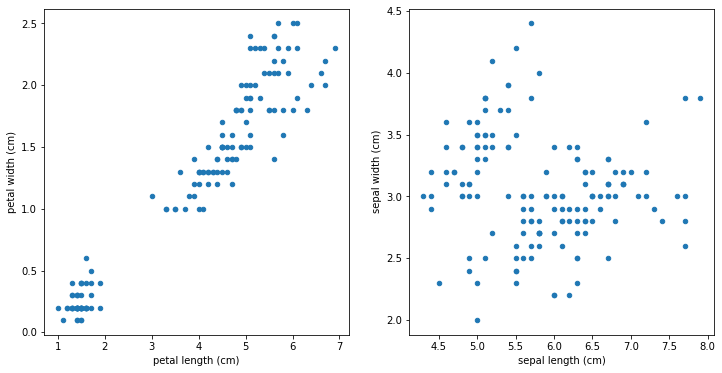

In [12]:
# plot
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))
data[col_x1].plot(kind = 'scatter', x = col_x1[0], y = col_x1[1], ax = ax1)
data[col_x2].plot(kind = 'scatter', x = col_x2[0], y = col_x2[1], ax = ax2)
plt.show()

In [16]:
from scipy import stats

## plot outliers detection results
def plot_outliers(X:'array', clf:'scikit estimator',title:str = '', outliers_fraction:float = 0.25):
    import matplotlib.pyplot as plt
    
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100), np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100))
        
    import time
    t0 = time.time()
    
    #try:
    #    y_pred = clf.fit(X).predict(X)
    #except:
    #    y_pred = clf.fit_predict(X)

    try:
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    except:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    threshold = stats.scoreatpercentile(scores_pred,
                                        100 * outliers_fraction)

        
    t1 = time.time()
    
    
    try:
        Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
    except:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
     
    
    subplot = plt.subplot()
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
    a = subplot.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')

    colors = np.array(['yellow', 'black'])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])  
 
    
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plt.xlabel('v1')
    plt.ylabel('v2')
    plt.title(title, fontsize = 14)
    plt.show()

In [27]:
from sklearn.neighbors import LocalOutlierFactor
outliers_fraction = 0.10
clf = LocalOutlierFactor(
        n_neighbors=25, contamination=outliers_fraction)

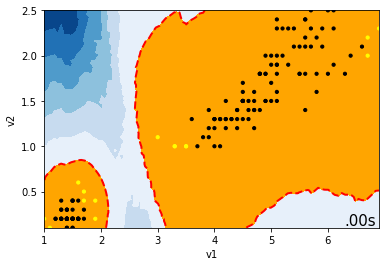

In [28]:
plot_outliers(data[col_x1].values, clf, title = '', outliers_fraction = outliers_fraction)

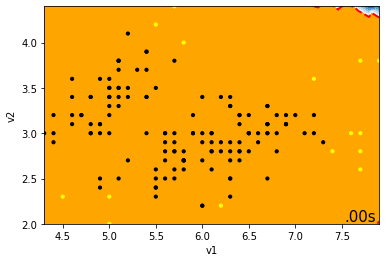

In [29]:
plot_outliers(data[col_x2].values, clf, title = '', outliers_fraction = outliers_fraction)

In [39]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.1
clf = IsolationForest(
    n_estimators = 100,
    max_samples = 'auto',
    max_features = 1.,
    bootstrap = False,
    #behaviour='new',
    contamination=outliers_fraction,
    random_state=42,
    n_jobs = -1
)

/Users/juan/miniconda3/envs/analysis/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/juan/miniconda3/envs/analysis/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


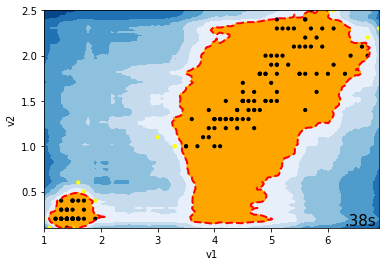

In [40]:
plot_outliers(data[col_x1].values, clf, title = '', outliers_fraction = outliers_fraction)

/Users/juan/miniconda3/envs/analysis/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/juan/miniconda3/envs/analysis/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


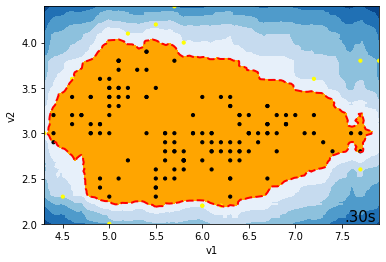

In [41]:
plot_outliers(data[col_x2].values, clf, title = '', outliers_fraction = outliers_fraction)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

In [87]:
col_x = col_x1 + col_x2
df =  data[col_x].copy()
X = df.values

#outliers_fraction = 0.10


from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=25, 
                         algorithm = 'auto',
                         metric = 'minkowski',
                         #contamination=outliers_fraction
                        )




        
try:
    y_pred = clf.fit(X).predict(X)
except:
    y_pred = clf.fit_predict(X)

print(f'There are {y_pred[y_pred == -1].shape[0]} outliers from {y_pred.shape[0]}.') 

if len(col_x) == 2:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    df['is_out'] = y_pred
    df[df['is_out'] == 1].plot(kind='scatter', x = col_x[0], y = col_x[1], ax = ax, color = 'blue')
    df[df['is_out'] == -1].plot(kind='scatter', x = col_x[0], y = col_x[1], ax = ax, color = 'red')
    plt.show()

There are 15 outliers from 150.
